# Hello PyTorch Neural Networks


This notebook contains a **hello world** example of neural networks with PyTorch. Basically a linear regression approximation


In [298]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time as t

device = "cuda" if torch.cuda.is_available() else "cpu"

## Linear regression Example

1. Generate some synthetic data

Text(0.5, 1.0, 'Training noisy data')

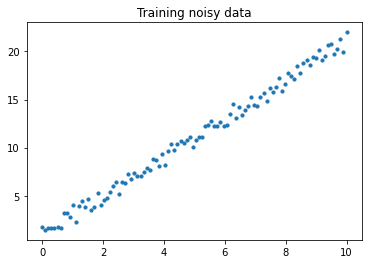

In [299]:
# Create some synthetic data
x = torch.linspace(0,10,100)
m = 2
y = x*m + torch.rand(x.shape)*2

plt.scatter(x,y, s=10)
plt.title("Training noisy data")

2. Create a model of a single neuron. By default the parameters of that model are initialized randomly. 

[('single_neuron.weight', Parameter containing:
tensor([[-0.5857]], device='cuda:0', requires_grad=True)), ('single_neuron.bias', Parameter containing:
tensor([-0.3191], device='cuda:0', requires_grad=True))]


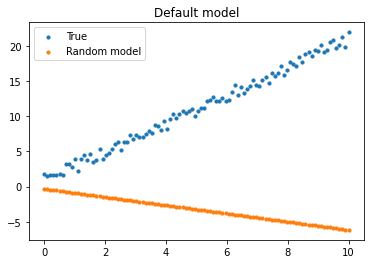

In [300]:
# Models are created by classes that inherit from Module
class SingleNeuronModel(nn.Module):
    # On the init function we define our model
    def __init__(self):
        super(SingleNeuronModel, self).__init__() # Constructor of parent class
        self.single_neuron =  nn.Linear(1, 1)
    
    # On the foreward model we indicate how to make one 'pass' of the model
    def forward(self, x):
        return self.single_neuron(x)

ex_model = SingleNeuronModel().to(device)
print(list(ex_model.named_parameters()))

#-------------- Just for plotting --------------
fig, ax = plt.subplots(1,1)
def plotCurrentModel(x, y, model, ax):
    # Torch receives inputs with shape [Examples, input_size]
    X = torch.reshape(x, (x.shape[0],1)).to(device)
    Y = torch.reshape(y, (y.shape[0],1)).to(device)
    model_y = model(X).cpu().detach().numpy()

    ax.scatter(x, y, s=10, label='True')
    ax.scatter(x, model_y, s=10, label='Random model')
    ax.set_title('Default model')
    ax.legend()
    
plotCurrentModel(x, y, ex_model, ax)

3.Optimize the parameters of the model using backpropagation 

In [301]:
loss_mse = nn.MSELoss() # Define loss function
optimizer = torch.optim.SGD(ex_model.parameters(), lr=1e-3) # Define optimization algorithm

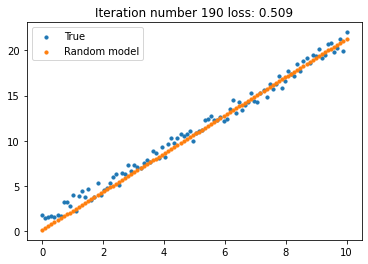

Done!


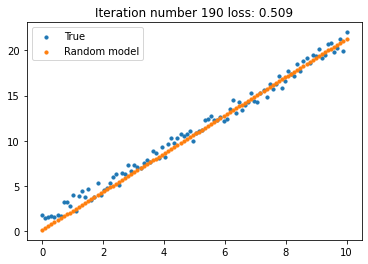

In [302]:
# Optimize the parameters several times

fig, ax = plt.subplots(1,1)
ex_model.train()
for i in range(200):
    pred = ex_model(X)
    loss = loss_mse(pred, Y)
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # ---------- Just for plotting ---------
    if i % 10 == 0: 
        title = f"Iteration number {i} loss: {loss:0.3f}"
        print(title)
        ax.cla()
        display.clear_output(wait =True)
        plotCurrentModel(x, y, ex_model, ax)
        ax.set_title(title)
        plt.draw()
        t.sleep(0.1)
        display.display(plt.gcf())
    
print("Done!")
    